# Preliminary Strain Calculations in the LIT-PCBA Dataset

* Protein: Opioid Kappa Receptor 1
  
* PDB: 67B3

* Protein Preparation: Default

* Grid: Default
 
* Ligands: Full Dataset (`inactives.smi`,`actives.smi`)

* Ligand Preparation: 
  
  * LIT-PCBA ligands (*.smi) have partially enumerated stereochemistry and protomers. I assigned unenumerated stereocenters via `MayaChemTools` and did not change initial protonation via LigPrep with a `ligprep.inp` file that removed protonation steps.
  
  * Input Inactives: `269816 inactives.smi`
  * RDKit Stereochemistry: `419268 inactives_rdkit.smi`
  * LigPrep 3D Conformer (predefined protonation): `419259 inactive_rdkit_ligprep.sdf`
  
  * Input Actives: `24 actives.smi`
  *  RDKit Stereochemistry: `33 actives_rdkit.smi`
  *  LigPrep 3D Conformer (predefined protonation): `32 actives_rdkit_ligprep.sdf`
 
* Docking: Glide (default) 

  * Inactives: `416037 inactive_rdkit_ligprep_glide_lib.sdf`
  * Actives: `32 actives_docking_67b3_lib.sdf`

* Strain: Torsion Strain Library Method 

In [2]:
import pickle 
import pandas as pd

#docking data as dataframe with rdkit mol objects
with open('inactive.pkl', 'rb') as f:
    inactive = pickle.load(f)

with (open('actives_final.pkl', 'rb')) as f:
    active = pickle.load(f)

In [3]:
duplicateRowsDF_inactive = inactive[inactive.duplicated(['Title'])]
display(duplicateRowsDF_inactive)
duplicateRowsDF_active = active[active.duplicated(['Title'])]
display(duplicateRowsDF_active)
#finally no duplicates in the docking data

,Title,Mol,Activity,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_lp_mmshare_version,i_m_source_file_index,i_f3d_flags,...,r_i_glide_ligand_efficiency_ln,r_i_glide_ligand_efficiency_sa,r_i_glide_lipo,r_i_glide_metal,r_i_glide_rewards,r_lp_Energy,s_i_glide_gridfile,s_lp_Force_Field,s_lp_Variant,s_m_source_file


,Title,Mol,Activity,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_lp_mmshare_version,i_m_source_file_index,i_f3d_flags,...,r_i_glide_ligand_efficiency_ln,r_i_glide_ligand_efficiency_sa,r_i_glide_lipo,r_i_glide_metal,r_i_glide_rewards,r_lp_Energy,s_i_glide_gridfile,s_lp_Force_Field,s_lp_Variant,s_m_source_file


In [4]:
def concatenate_csv_files(file_list):
    """
    Concatenates multiple strain CSV files into a single dataframe.
    Only the first five columns are kept for now.

    Args:
        file_list (list): A list of file paths to the CSV files.

    Returns:
        pandas.DataFrame: The concatenated dataframe.

    """
    # Specify the column names
    column_names = [
        "Molecule_Name",
        "Total_E",
        "Lower_Bound",
        "Upper_Bound",
        "Num_Torsion_Patterns",
    ]

    # List to hold dataframes
    df_list = []

    # Loop over each file in the list
    for file in file_list:
        # Import the CSV file as a df, using only the first five columns of the CSV file
        df = pd.read_csv(file, usecols=range(5), names=column_names, header=0)
        df_list.append(df)

    # Concatenate all dataframes in the list
    final_df = pd.concat(df_list, ignore_index=True)

    return final_df

In [7]:
import glob

# Use glob to get csv files ('subset_*.csv) from the directory
csv_files = glob.glob("inactive_subset_sdf/inactive_subset_*.csv")

print(csv_files)

# Concatenate the CSV files
OPRK1_inactives_strain = concatenate_csv_files(csv_files)

# Molecule_Name is being read as a float, so convert it to a string
OPRK1_inactives_strain["Molecule_Name"] = OPRK1_inactives_strain[
    "Molecule_Name"
].astype(str)

# Display the first five rows
display(OPRK1_inactives_strain.head())

# Display summary statistics, rounded to one decimal places
display(OPRK1_inactives_strain.describe().round(1))

duplicateRowsStrain = OPRK1_inactives_strain[OPRK1_inactives_strain.duplicated(['Molecule_Name'])]
display(duplicateRowsStrain)
#finally no duplicates in the in active strain data

['inactive_subset_sdf/inactive_subset_8.csv', 'inactive_subset_sdf/inactive_subset_9.csv', 'inactive_subset_sdf/inactive_subset_4.csv', 'inactive_subset_sdf/inactive_subset_5.csv', 'inactive_subset_sdf/inactive_subset_7.csv', 'inactive_subset_sdf/inactive_subset_6.csv', 'inactive_subset_sdf/inactive_subset_2.csv', 'inactive_subset_sdf/inactive_subset_3.csv', 'inactive_subset_sdf/inactive_subset_1.csv', 'inactive_subset_sdf/inactive_subset_10.csv']


,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
0,24782405_Isomer1,5.881947,5.227915,6.930462,5.0
1,26671254_Isomer2,5.568972,4.874714,6.591071,1.0
2,17504917_Isomer2,3.969577,3.598908,4.386137,5.0
3,49721204_Isomer1,1.701584,1.338719,2.117415,3.0
4,17432781_Isomer1,11.207053,7.833494,NaN,6.0


,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
count,413123.0,413123.0,214798.0,413123.0
mean,5.7,4.6,inf,2.6
std,3.3,2.6,NaN,2.2
min,-2.0,-0.1,0.0,0.0
25%,3.3,2.7,2.6,1.0
50%,5.3,4.3,4.5,2.0
75%,7.7,6.2,7.4,4.0
max,30.9,23.3,inf,18.0


,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns


In [8]:
# We can still use concatenate_csv_files() to read in the active strain data
OPRK1_actives_strain = concatenate_csv_files(["actives_docking_67b3_lib.csv"])

# Molecule_Name is being read as a float, so convert it to a string
OPRK1_actives_strain["Molecule_Name"] = OPRK1_actives_strain["Molecule_Name"].astype(
    str
)

# Display the first five rows
display(OPRK1_actives_strain.head())

# Display summary statistics, rounded to one decimal places
display(OPRK1_actives_strain.describe().round(1))

duplicateRowsStrain = OPRK1_actives_strain[OPRK1_actives_strain.duplicated(['Molecule_Name'])]
display(duplicateRowsStrain)
#finally no duplicates in the active strain data


,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
0,14721919_Isomer1,3.588700,3.103050,4.159597,0
1,14733740_Isomer2,8.297316,6.628690,NaN,6
2,14742361_Isomer1,11.917725,8.202170,NaN,0
3,51085197_Isomer1,8.448169,6.548595,inf,2
4,51085197_Isomer2,7.090288,5.906400,inf,2


/Users/lkv206/miniconda3/envs/analytics_env/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
count,31.0,31.0,9.0,31.0
mean,7.7,6.0,inf,2.9
std,3.2,2.4,NaN,2.7
min,0.9,0.7,1.2,0.0
25%,6.7,4.8,2.6,1.0
50%,8.5,6.6,3.2,2.0
75%,9.5,7.5,NaN,4.0
max,14.3,10.1,inf,8.0


,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns


In [12]:
active.rename(columns={"Title": "Molecule_Name"}, inplace=True)
inactive.rename(columns={"Title": "Molecule_Name"}, inplace=True)


# Merge the active and inactive dataframes
active_data = active.merge(OPRK1_actives_strain, how="left", on="Molecule_Name").copy(
    deep=True
)

inactive_data = inactive.merge(
    OPRK1_inactives_strain, how="left", on="Molecule_Name"
).copy(deep=True)

# Shape after merging
print("Shape after merging:")
print(active_data.shape)
print(inactive_data.shape)

duplicate_actives = active_data[active_data.duplicated(["Molecule_Name"])]
display(duplicate_actives)
duplicate_inactives = inactive_data[inactive_data.duplicated(["Molecule_Name"])]
display(duplicate_inactives)
# yes! no duplicates AT ALL


# Concatenate the active and inactive dataframes as "all_data"
all_data = pd.concat([active_data, inactive_data], ignore_index=True)
duplicate_all = all_data[all_data.duplicated(["Molecule_Name"])]
display(duplicate_all)
# yes! no duplicates AT ALL

Shape after merging:
(32, 37)
(416034, 37)


,Molecule_Name,Mol,Activity,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_lp_mmshare_version,i_m_source_file_index,i_f3d_flags,...,r_i_glide_rewards,r_lp_Energy,s_i_glide_gridfile,s_lp_Force_Field,s_lp_Variant,s_m_source_file,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns


,Molecule_Name,Mol,Activity,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_lp_mmshare_version,i_m_source_file_index,i_f3d_flags,...,r_i_glide_rewards,r_lp_Energy,s_i_glide_gridfile,s_lp_Force_Field,s_lp_Variant,s_m_source_file,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns


,Molecule_Name,Mol,Activity,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_lp_mmshare_version,i_m_source_file_index,i_f3d_flags,...,r_i_glide_rewards,r_lp_Energy,s_i_glide_gridfile,s_lp_Force_Field,s_lp_Variant,s_m_source_file,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns


In [15]:
# Make a subset of all_data containing these columns: 'Molecule_Name', 'Mol', 'Activity', 'r_i_docking_score', 'Total_E', 'Lower_Bound', 'Upper_Bound'
data = all_data[
    [
        "Molecule_Name",
        "Mol",
        "Activity",
        "r_i_docking_score",
        "Total_E",
        "Lower_Bound",
        "Upper_Bound",
    ]
].copy(deep=True)
data

,Molecule_Name,Mol,Activity,r_i_docking_score,Total_E,Lower_Bound,Upper_Bound
0,49819640_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3774e74c0>,1,-8.55282,NaN,NaN,NaN
1,14721919_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3774e7420>,1,-7.92756,3.588700,3.103050,4.159597
2,14733740_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x3774e7380>,1,-7.82703,8.297316,6.628690,NaN
3,14742361_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3774e72e0>,1,-7.81884,11.917725,8.202170,NaN
4,51085197_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3774e7240>,1,-7.79313,8.448169,6.548595,inf
...,...,...,...,...,...,...,...
416061,843849_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x50c1004f0>,0,-5.27684,3.256620,2.580519,4.265742
416062,49825329_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x50c100540>,0,-5.27682,6.770525,6.004448,8.512007
416063,7973941_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x50c100590>,0,-5.27682,5.927111,5.102719,inf
416064,7973941_Isomer8,<rdkit.Chem.rdchem.Mol object at 0x50c1005e0>,0,-5.27682,5.927111,5.102719,inf


Now to calculate Enrichment Metrics for just the docking score.

In [14]:
def calculate_enrichment_parameters(df):
    """
    Calculates parameters we will need for Enrichment Plots

    Parameters:
    df (pandas.DataFrame): The dataframe to calculate the logAUC for.

    Returns:
    pandas.DataFrame: The dataframe with the logAUC calculated.
    """
    # Sort the subset by 'r_i_docking_score' in ascending order
    df.sort_values(by="r_i_docking_score", inplace=True)

    # Reset the index so that we are ranking by the docking score
    df.reset_index(drop=True, inplace=True)

    # Adjusting the index to start from 1
    df.index += 1

    # Calculate the cumulative sum of active compounds
    df["Cumulative_Actives"] = df["Activity"].cumsum()

    # Calculate the Total Actives
    df["Total_Actives"] = df["Activity"].sum()

    # Calculate the fraction of identified actives at each row
    df["Fraction_Actives"] = df["Cumulative_Actives"] / df["Total_Actives"]

    # Calculate the percentage of compounds screened at each row
    df["Percentage_Screened"] = df.index / len(df)

    return df

In [16]:
calculate_enrichment_parameters(data)

,Molecule_Name,Mol,Activity,r_i_docking_score,Total_E,Lower_Bound,Upper_Bound,Cumulative_Actives,Total_Actives,Fraction_Actives,Percentage_Screened
1,17509036_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3daa11030>,0,-11.379000,NaN,NaN,NaN,0,32,0.0,0.000002
2,17407344_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x3e93f10d0>,0,-11.056100,10.874642,8.114060,NaN,0,32,0.0,0.000005
3,24784061_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3daa11120>,0,-10.927400,10.776421,9.678175,12.288472,0,32,0.0,0.000007
4,17407000_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x3daa11170>,0,-10.844300,12.382699,8.309666,NaN,0,32,0.0,0.000010
5,49733857_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3daa111c0>,0,-10.760900,15.507212,11.084552,NaN,0,32,0.0,0.000012
...,...,...,...,...,...,...,...,...,...,...,...
416062,4244719_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x41774a5c0>,0,0.866568,6.162786,5.536448,inf,32,32,1.0,0.999990
416063,26663220_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x41774a610>,0,0.898282,4.117408,3.237282,NaN,32,32,1.0,0.999993
416064,4261347_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x41774a660>,0,0.976042,9.526736,7.904226,NaN,32,32,1.0,0.999995
416065,49829067_Isomer3,<rdkit.Chem.rdchem.Mol object at 0x41774a6b0>,0,1.171660,10.321729,7.843475,NaN,32,32,1.0,0.999998


In [17]:
# Find the first row where the Fraction_Actives is equal to 1.0
# Create a boolean mask where each value is True if the corresponding value in 'Fraction_Actives' is 1.0
mask = data["Fraction_Actives"] == 1.0

# Find the index of the first True value in the mask
first_row_index = mask.idxmax()

# Get the entire row at that index
first_row = data.loc[first_row_index]

# Percent where we should reach "1" in the Enrichment plot
percent = round((first_row_index / len(data) * 100))

print(
    f"The first row where 'Fraction_Actives' is equal to 1.0 is at index: {first_row_index}."
)
print(f"This corresponds to the {percent}% of the data.")
print(f"The entire row at this index is:\n{first_row}")

The first row where 'Fraction_Actives' is equal to 1.0 is at index: 410709.
This corresponds to the 99% of the data.
The entire row at this index is:
Molecule_Name                                       24810675_Isomer1
Mol                    <rdkit.Chem.rdchem.Mol object at 0x3774e6160>
Activity                                                           1
r_i_docking_score                                           -4.31976
Total_E                                                     9.300247
Lower_Bound                                                 7.608795
Upper_Bound                                                      NaN
Cumulative_Actives                                                32
Total_Actives                                                     32
Fraction_Actives                                                 1.0
Percentage_Screened                                         0.987125
Name: 410709, dtype: object


In [18]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import auc

matplotlib.rcdefaults()
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.dpi"] = 144


def plot_enrichment_curve(df):
    """
    Plots the enrichment curve for a dataframe.

    Parameters:
    df (pandas.DataFrame): The dataframe to plot the enrichment curve for.
    enrichment_auc (float): The area under the curve for the enrichment.

    Returns:
    None
    """
    enrichment_auc = auc(df["Percentage_Screened"], df["Fraction_Actives"])

    plt.plot(
        df["Percentage_Screened"] * 100,
        df["Fraction_Actives"],
        label="Enrichment AUC = {:.2f}".format(enrichment_auc),
    )

    # Add axis labels and title
    plt.xlabel("Compounds Screened (%)")
    plt.ylabel("Fraction of Identified Actives")
    plt.title("Enrichment Curve")

    plt.legend()
    plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_6397/3990542446.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


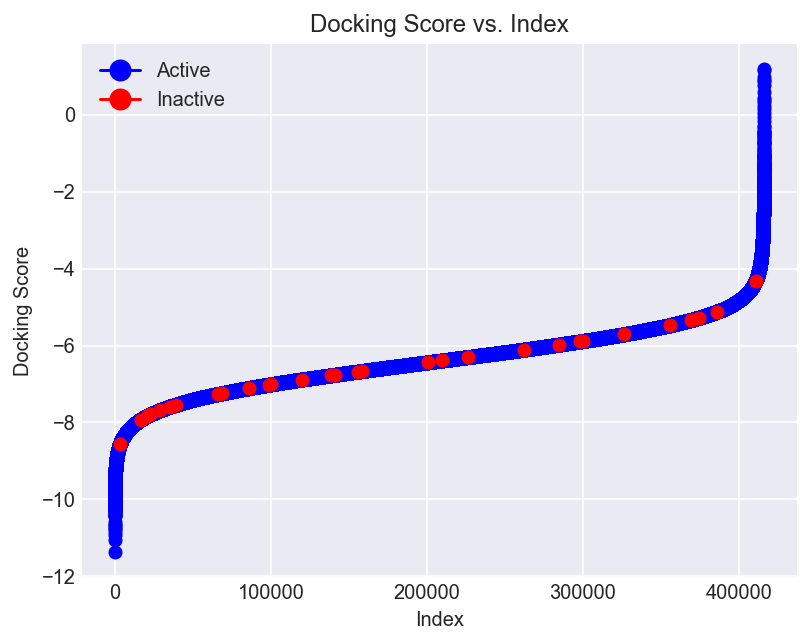

In [24]:
import matplotlib.lines as mlines

# Create a scatter plot of 'r_i_docking_score' vs. the index

# Plot points with Activity = 0
plt.scatter(
    data[data["Activity"] == 0].index,
    data[data["Activity"] == 0]["r_i_docking_score"],
    c="blue",
    label="Activity = 0",
)

# Plot points with Activity = 1
plt.scatter(
    data[data["Activity"] == 1].index,
    data[data["Activity"] == 1]["r_i_docking_score"],
    c="red",
    label="Activity = 1",
)

# Create a custom legend
blue_line = mlines.Line2D(
    [], [], color="blue", marker="o", markersize=10, label="Active"
)
red_line = mlines.Line2D(
    [], [], color="red", marker="o", markersize=10, label="Inactive"
)


plt.legend(handles=[blue_line, red_line])

# Add title and labels
plt.title("Docking Score vs. Index")
plt.xlabel("Index")
plt.ylabel("Docking Score")

# Show the plot
plt.show()

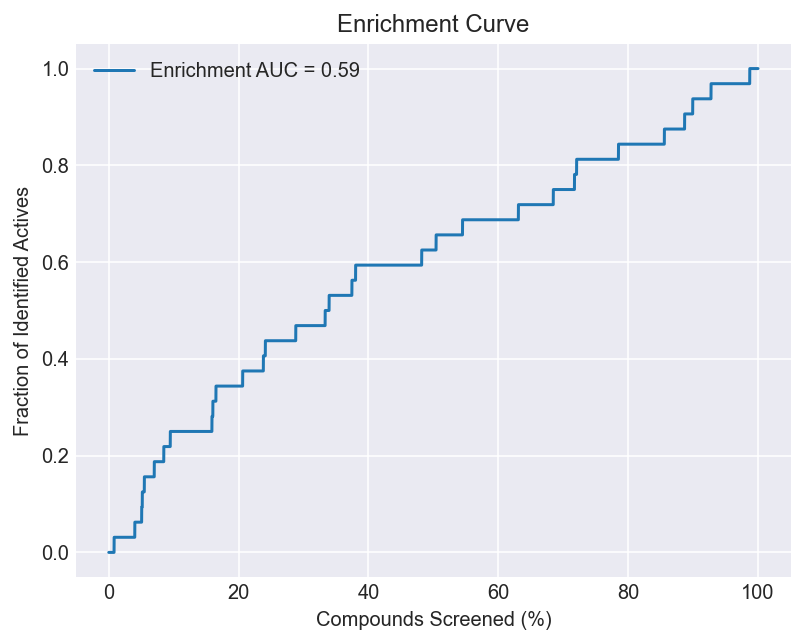

In [19]:
plot_enrichment_curve(data)

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def plot_roc_curve_inverted(y_true, y_scores):
    """
    Plot the ROC curve for the given true labels and inverted scores.

    :param y_true: The true binary labels.
    :param y_scores: The predicted scores where lower scores indicate positive class.
    """
    # Inverting the scores
    y_scores_inverted = -y_scores

    # Compute the ROC curve and AUC with inverted scores
    fpr, tpr, thresholds = roc_curve(y_true, y_scores_inverted)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(
        fpr, tpr, lw=2, label=f"ROC curve (area = {roc_auc:.2f})"
    )
    plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (Inverted Scores)")
    plt.legend(loc="best")
    plt.show()


# Example usage:
# plot_roc_curve_inverted(data['Activity'], data['r_i_docking_score'])

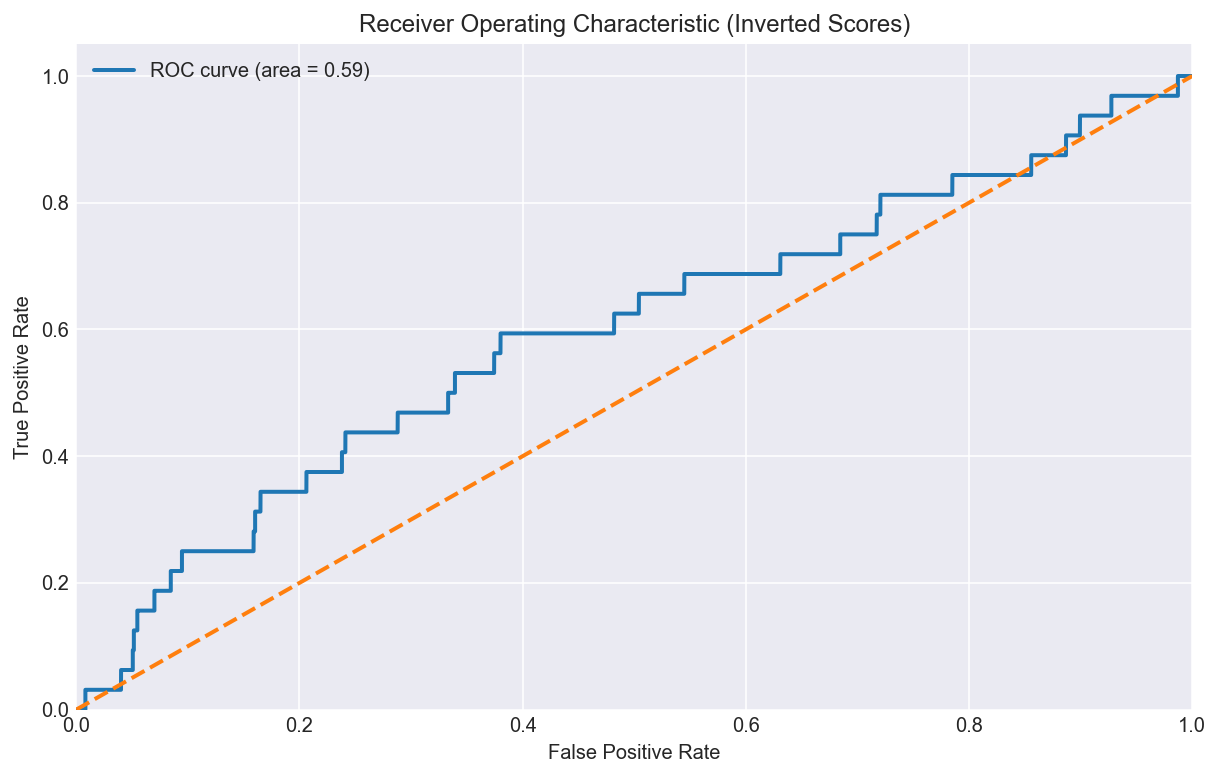

In [31]:
plot_roc_curve_inverted(data['Activity'], data['r_i_docking_score'])

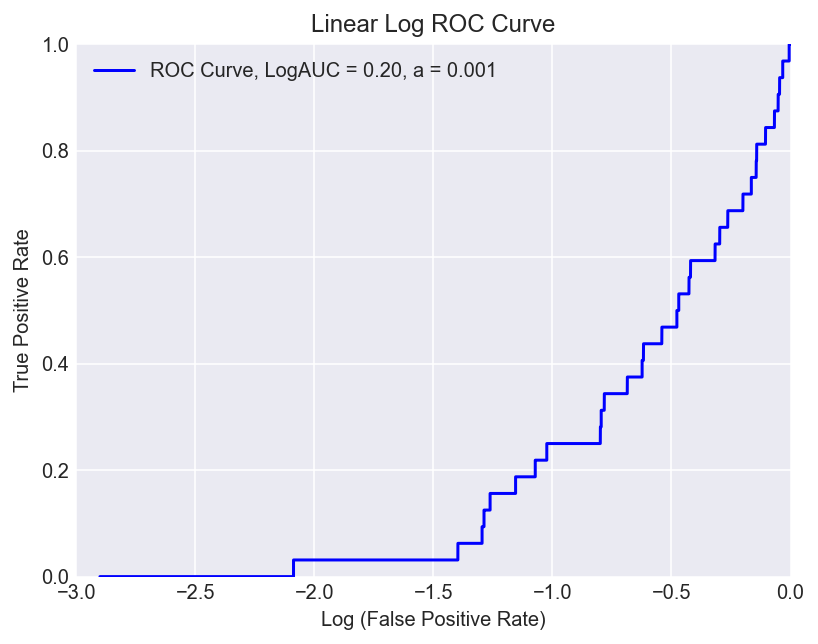

Range of integration in linlog_auc: -2.9006271355311 to 0.0
Value of linglog_auc: 0.5955343532560321
Value of log_auc: 0.19851145108534404


In [41]:
import numpy as np

def plot_linlog_roc_curve(df, a=1e-3):
    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Calculate the AUC for the valid range
    linlog_auc = auc(log_fpr_valid, tpr_valid)
    log_auc = linlog_auc / -np.log10(a)

    # Plot the ROC curve
    plt.plot(
        log_fpr_valid,
        tpr_valid,
        color="blue",
        label=f"ROC Curve, LogAUC = {log_auc:.2f}, a = {a}",
    )

    plt.xlim([np.log10(a), 0])
    plt.ylim([0, 1])
    plt.xlabel("Log (False Positive Rate)")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="upper left")
    plt.title("Linear Log ROC Curve")
    plt.show()

    print(f"Range of integration in linlog_auc: {log_fpr_valid[0]} to {log_fpr_valid[-1]}")
    print(f"Value of linglog_auc: {linlog_auc}")
    print(f"Value of log_auc: {log_auc}")


# Running the function with the provided dataset
plot_linlog_roc_curve(data)

We need a modular version of this function that can take some data structure of dataframes with strain filters and plot the relevant plots.

but what exactly do we want to do? we ultimately want to compare different strain computational methods and integration methods (weights or filters) that result in the best vs enrichment across a set of relevant targets/datasets.

we then want to integrate this towards deep docking. 

is finding the best way of implementing a strain cut off per dataset useful? i don't think so. we're at the mercy of however that dataset behaves. at least as far as LIT PCBA: if we find a cherry picked best strain for enrichment, yes, it will probably help with deep docking, but considering one target isn't very useful. 

doing a sort of target specific strain analysis is maybe a good idea if (1) the target has many high quality pdbs. when i say high quality, i am really referring to metrics like some of the papers have done on bench marking. 

if we benchmark strain on lit-pcba, we are probably going to get good results, but only for those systems. 

i guess we probably bench mark on both both. the pdb data set tells us what strain we see in high quality pdb data, lit pcba tells us what strain we see in docking. if we look at these enrichment papers, they really do just end up giving you a delta logauc for a bunch of systems without really doing much more analysis. they do mention some of my worries, like that some strain filter could improve your auc but just filter out almost every compound. i guess at ultra large scales - what else are you going to do? i guess a first pass is to just see if logauc improves at all, dig into the data more and see whats going on. 

re reading the paper, they report the average effect of strain on logauc in fig 6, let's make something like that

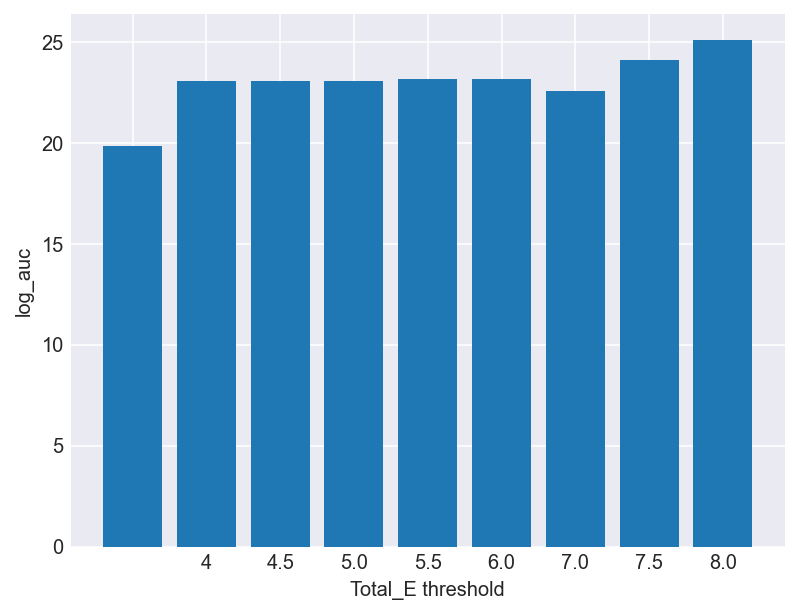

In [47]:
import matplotlib.pyplot as plt


def logauc_by_strain(df, a=1e-3, total_e_threshold=None):
    # Filter dataframe based on 'Total_E' threshold if provided
    if total_e_threshold is not None:
        df = df[df["Total_E"] <= total_e_threshold]

    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr, _ = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Calculate the AUC for the valid range
    linlog_auc = auc(log_fpr_valid, tpr_valid)
    log_auc = (linlog_auc / -np.log10(a))*100

    return log_auc


# List of 'Total_E' thresholds
total_e_thresholds = [None, 4, 4.5, 5.0, 5.5, 6.0, 7.0, 7.5, 8.0]

# Calculate log_auc for each threshold and plot
log_aucs = [logauc_by_strain(data, total_e_threshold=t) for t in total_e_thresholds
]
plt.bar(range(len(total_e_thresholds)), log_aucs, tick_label=total_e_thresholds)
plt.xlabel("Total_E threshold")
plt.ylabel("log_auc")
plt.show()

They actually multiply logauc by 100 in their work, they ref an old paper with this quote 


> A random selection of compounds from the mixture of actual ligands and decoys yields a logAUC of 14.5;

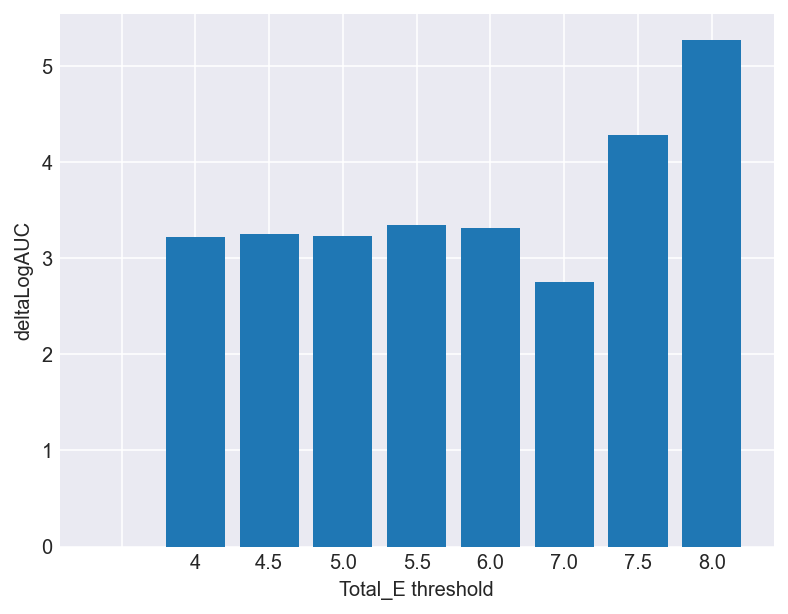

In [48]:
def delta_logauc_by_strain(df, a=1e-3, total_e_threshold=None):
    # Calculate log_auc for no filtering
    log_auc_none = logauc_by_strain(df, a, total_e_threshold=None)

    # Calculate log_auc for the given threshold
    log_auc_threshold = logauc_by_strain(df, a, total_e_threshold)

    # Calculate deltaLogAUC
    delta_log_auc = log_auc_threshold - log_auc_none

    return delta_log_auc

# Calculate deltaLogAUC for each threshold and plot
delta_log_aucs = [delta_logauc_by_strain(data, total_e_threshold=t) for t in total_e_thresholds]
plt.bar(range(len(total_e_thresholds)), delta_log_aucs, tick_label=total_e_thresholds)
plt.xlabel("Total_E threshold")
plt.ylabel("deltaLogAUC")
plt.show()

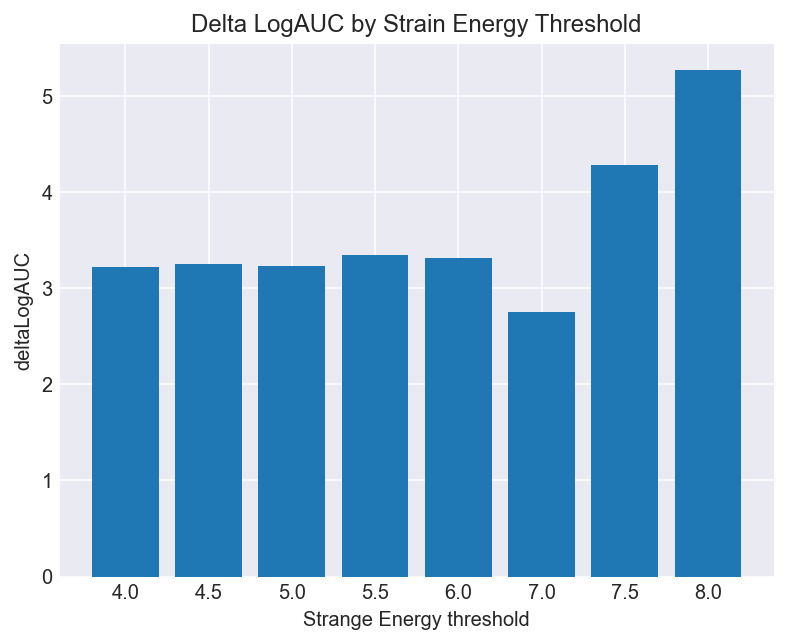

In [50]:
def delta_logauc_by_strain(df, a=1e-3, total_e_threshold=None):
    # Calculate log_auc for no filtering
    log_auc_none = logauc_by_strain(df, a, total_e_threshold=None)

    # Calculate log_auc for the given threshold
    log_auc_threshold = logauc_by_strain(df, a, total_e_threshold)

    # Calculate deltaLogAUC
    delta_log_auc = log_auc_threshold - log_auc_none

    return delta_log_auc

# Calculate deltaLogAUC for each threshold and plot
delta_log_aucs = [delta_logauc_by_strain(data, total_e_threshold=t) for t in total_e_thresholds[1:]]
plt.bar(range(len(total_e_thresholds[1:])), delta_log_aucs, tick_label=total_e_thresholds[1:])
plt.xlabel("Strange Energy threshold")
plt.ylabel("deltaLogAUC")
plt.title("Delta LogAUC by Strain Energy Threshold")
plt.show()

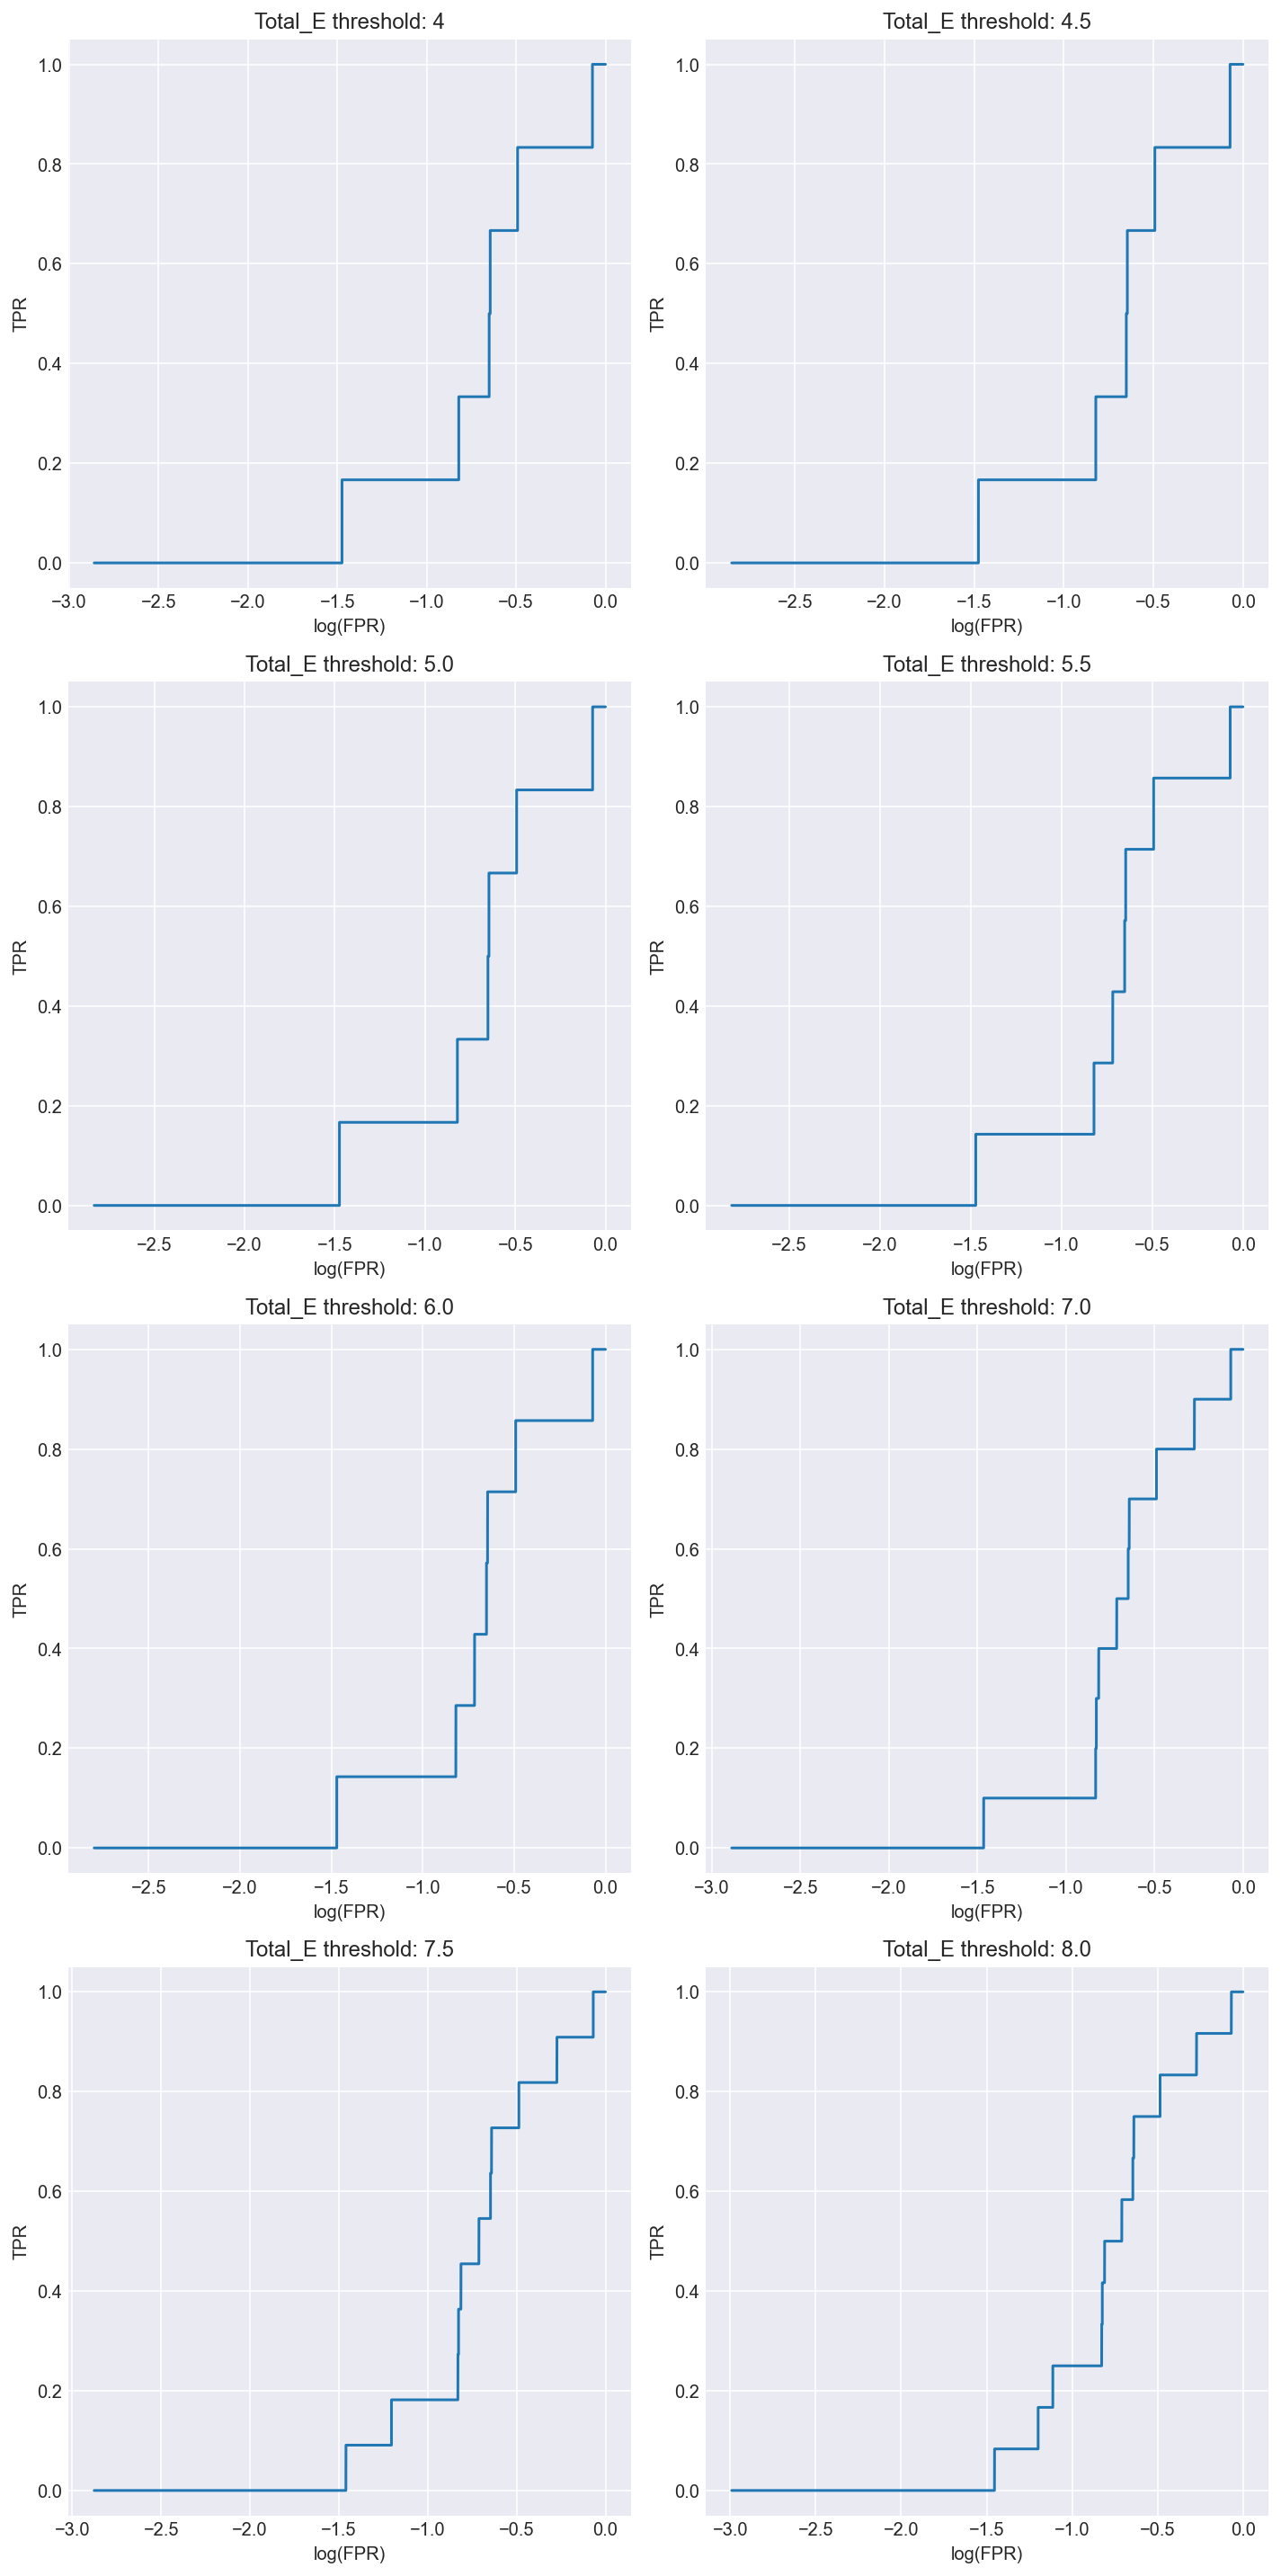

In [51]:
def plot_semi_log_roc(df, a=1e-3, total_e_threshold=None, ax=None):
    # Filter dataframe based on 'Total_E' threshold if provided
    if total_e_threshold is not None:
        df = df[df["Total_E"] <= total_e_threshold]

    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr, _ = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Plot semi-log ROC curve
    ax.plot(log_fpr_valid, tpr_valid)

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Plot semi-log ROC curve for each threshold
for i, t in enumerate(total_e_thresholds[1:]):
    ax = axs[i//2, i%2]
    plot_semi_log_roc(data, total_e_threshold=t, ax=ax)
    ax.set_title(f"Total_E threshold: {t}")
    ax.set_xlabel("log(FPR)")
    ax.set_ylabel("TPR")

plt.tight_layout()
plt.show()

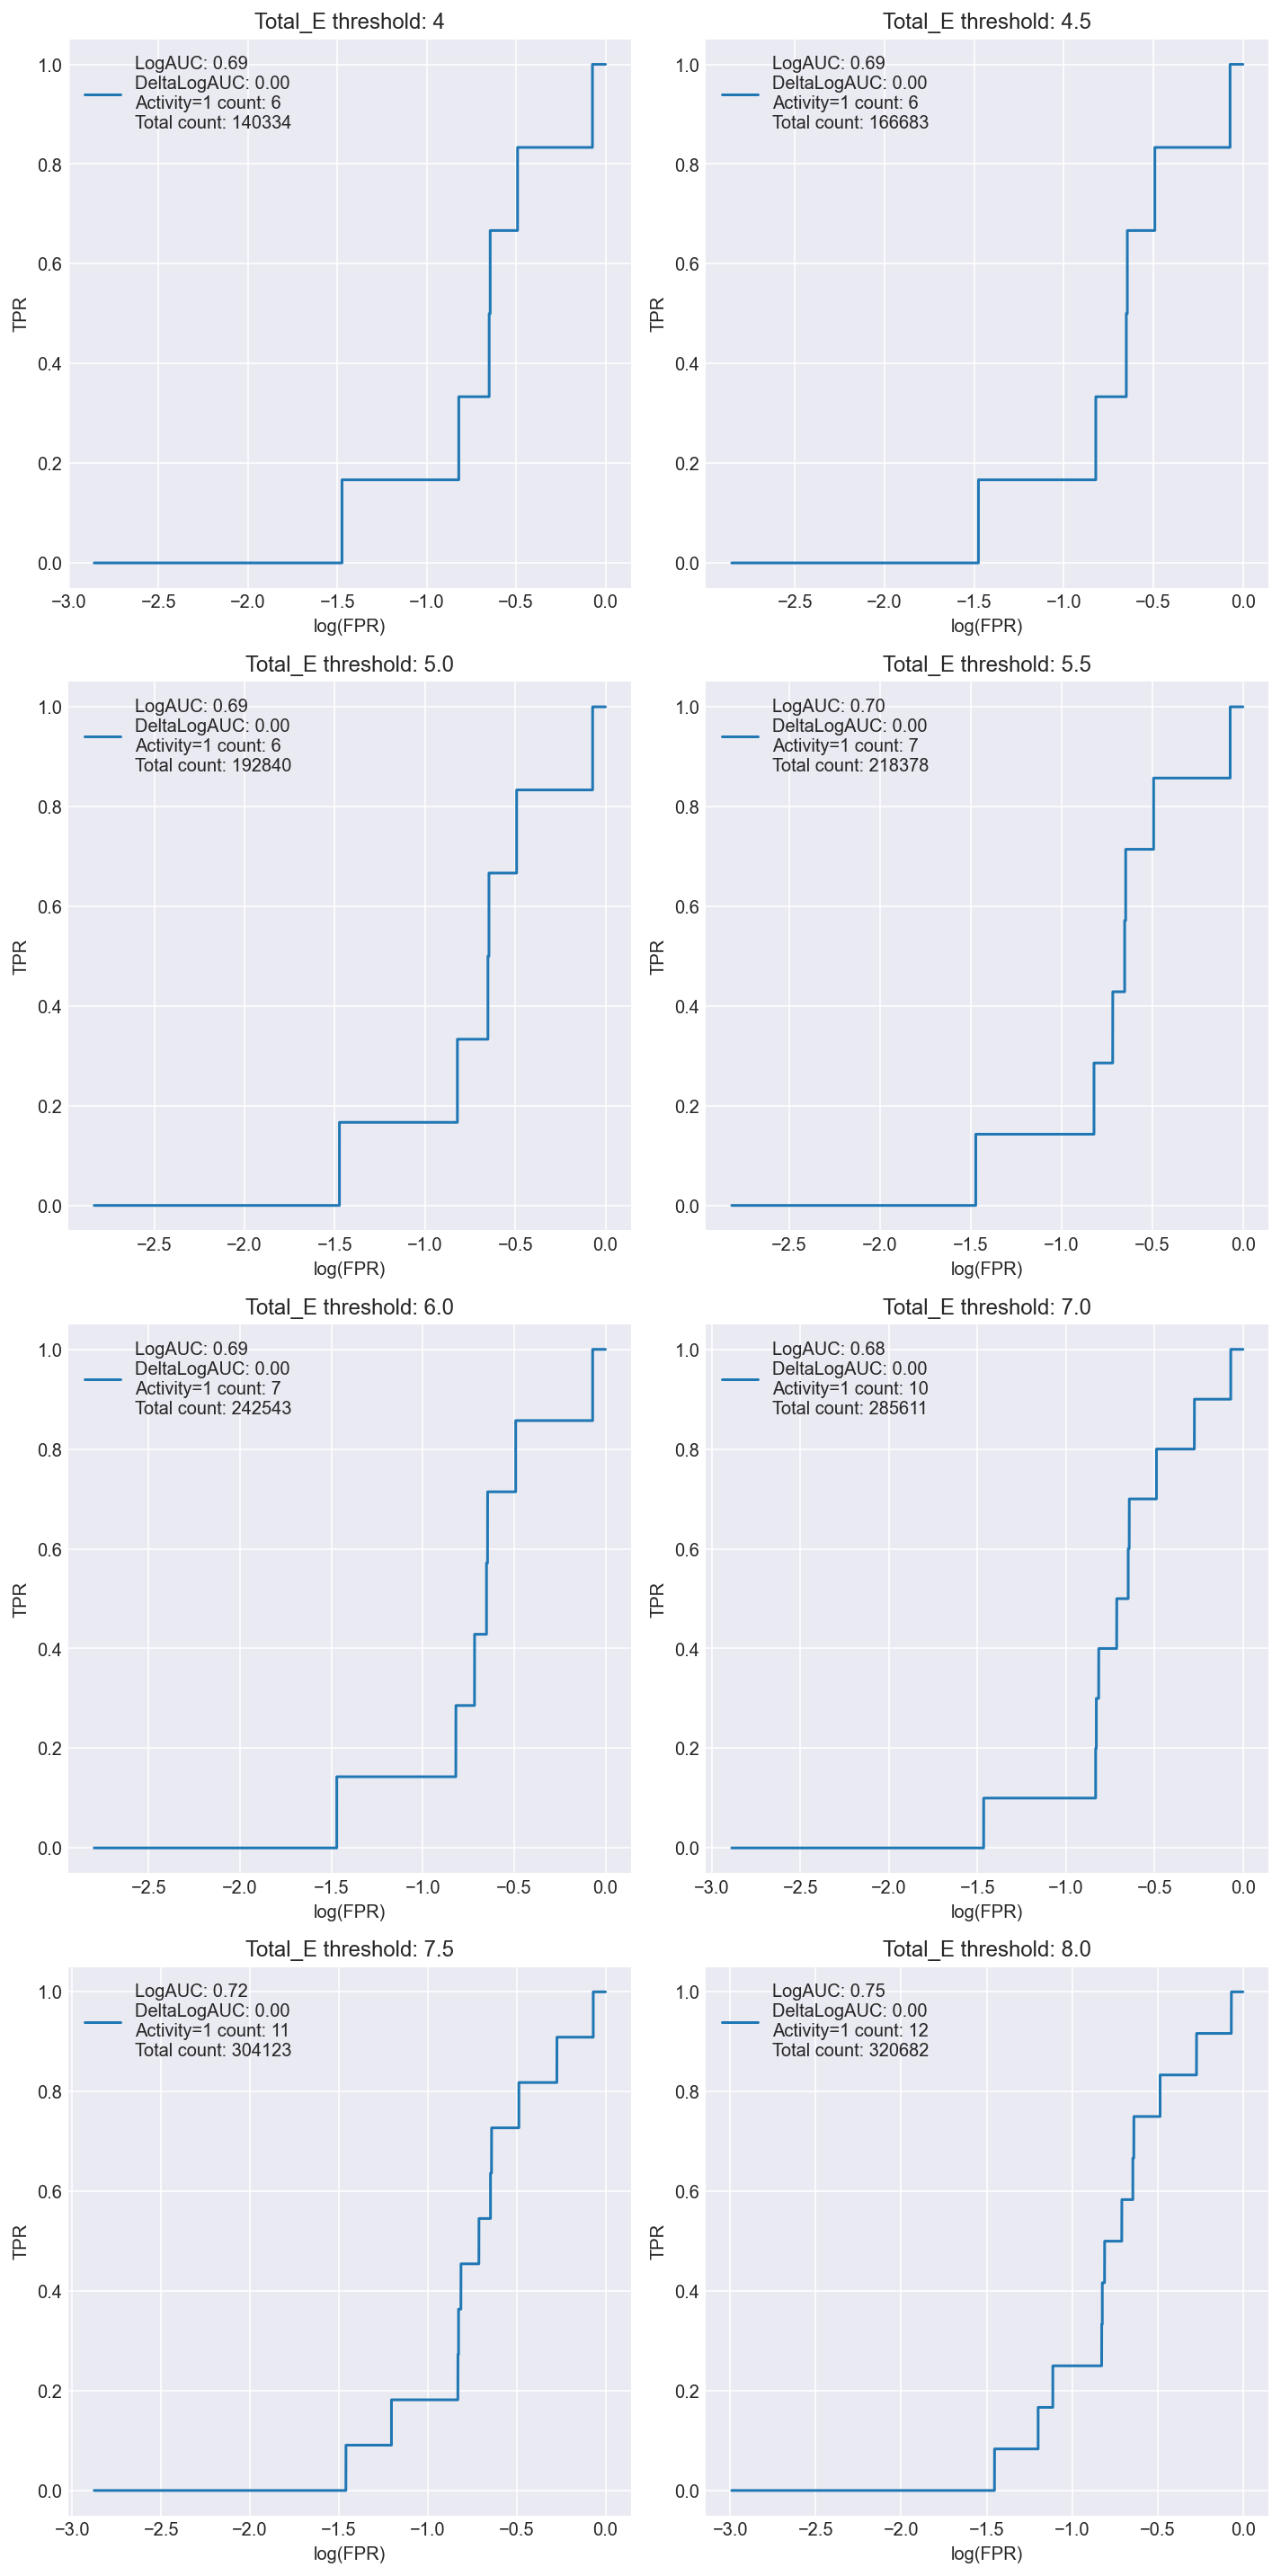

In [54]:
def plot_semi_log_roc(df, a=1e-3, total_e_threshold=None, ax=None):
    # Filter dataframe based on 'Total_E' threshold if provided
    if total_e_threshold is not None:
        df = df[df["Total_E"] <= total_e_threshold]

    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr, _ = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Calculate LogAUC and deltaLogAUC
    log_auc = auc(log_fpr_valid, tpr_valid)
    delta_log_auc = delta_logauc_by_strain(df, a, total_e_threshold)

    # Count the number of rows with Activity = 1 and the total number of rows
    activity_1_count = df[df["Activity"] == 1].shape[0]
    total_count = df.shape[0]

    # Plot semi-log ROC curve
    ax.plot(log_fpr_valid, tpr_valid, label=f'LogAUC: {log_auc:.2f}\nDeltaLogAUC: {delta_log_auc:.2f}\nActivity=1 count: {activity_1_count}\nTotal count: {total_count}')
    ax.legend()

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Plot semi-log ROC curve for each threshold
for i, t in enumerate(total_e_thresholds[1:]):
    ax = axs[i//2, i%2]
    plot_semi_log_roc(data, total_e_threshold=t, ax=ax)
    ax.set_title(f"Total_E threshold: {t}")
    ax.set_xlabel("log(FPR)")
    ax.set_ylabel("TPR")

plt.tight_layout()
plt.show()

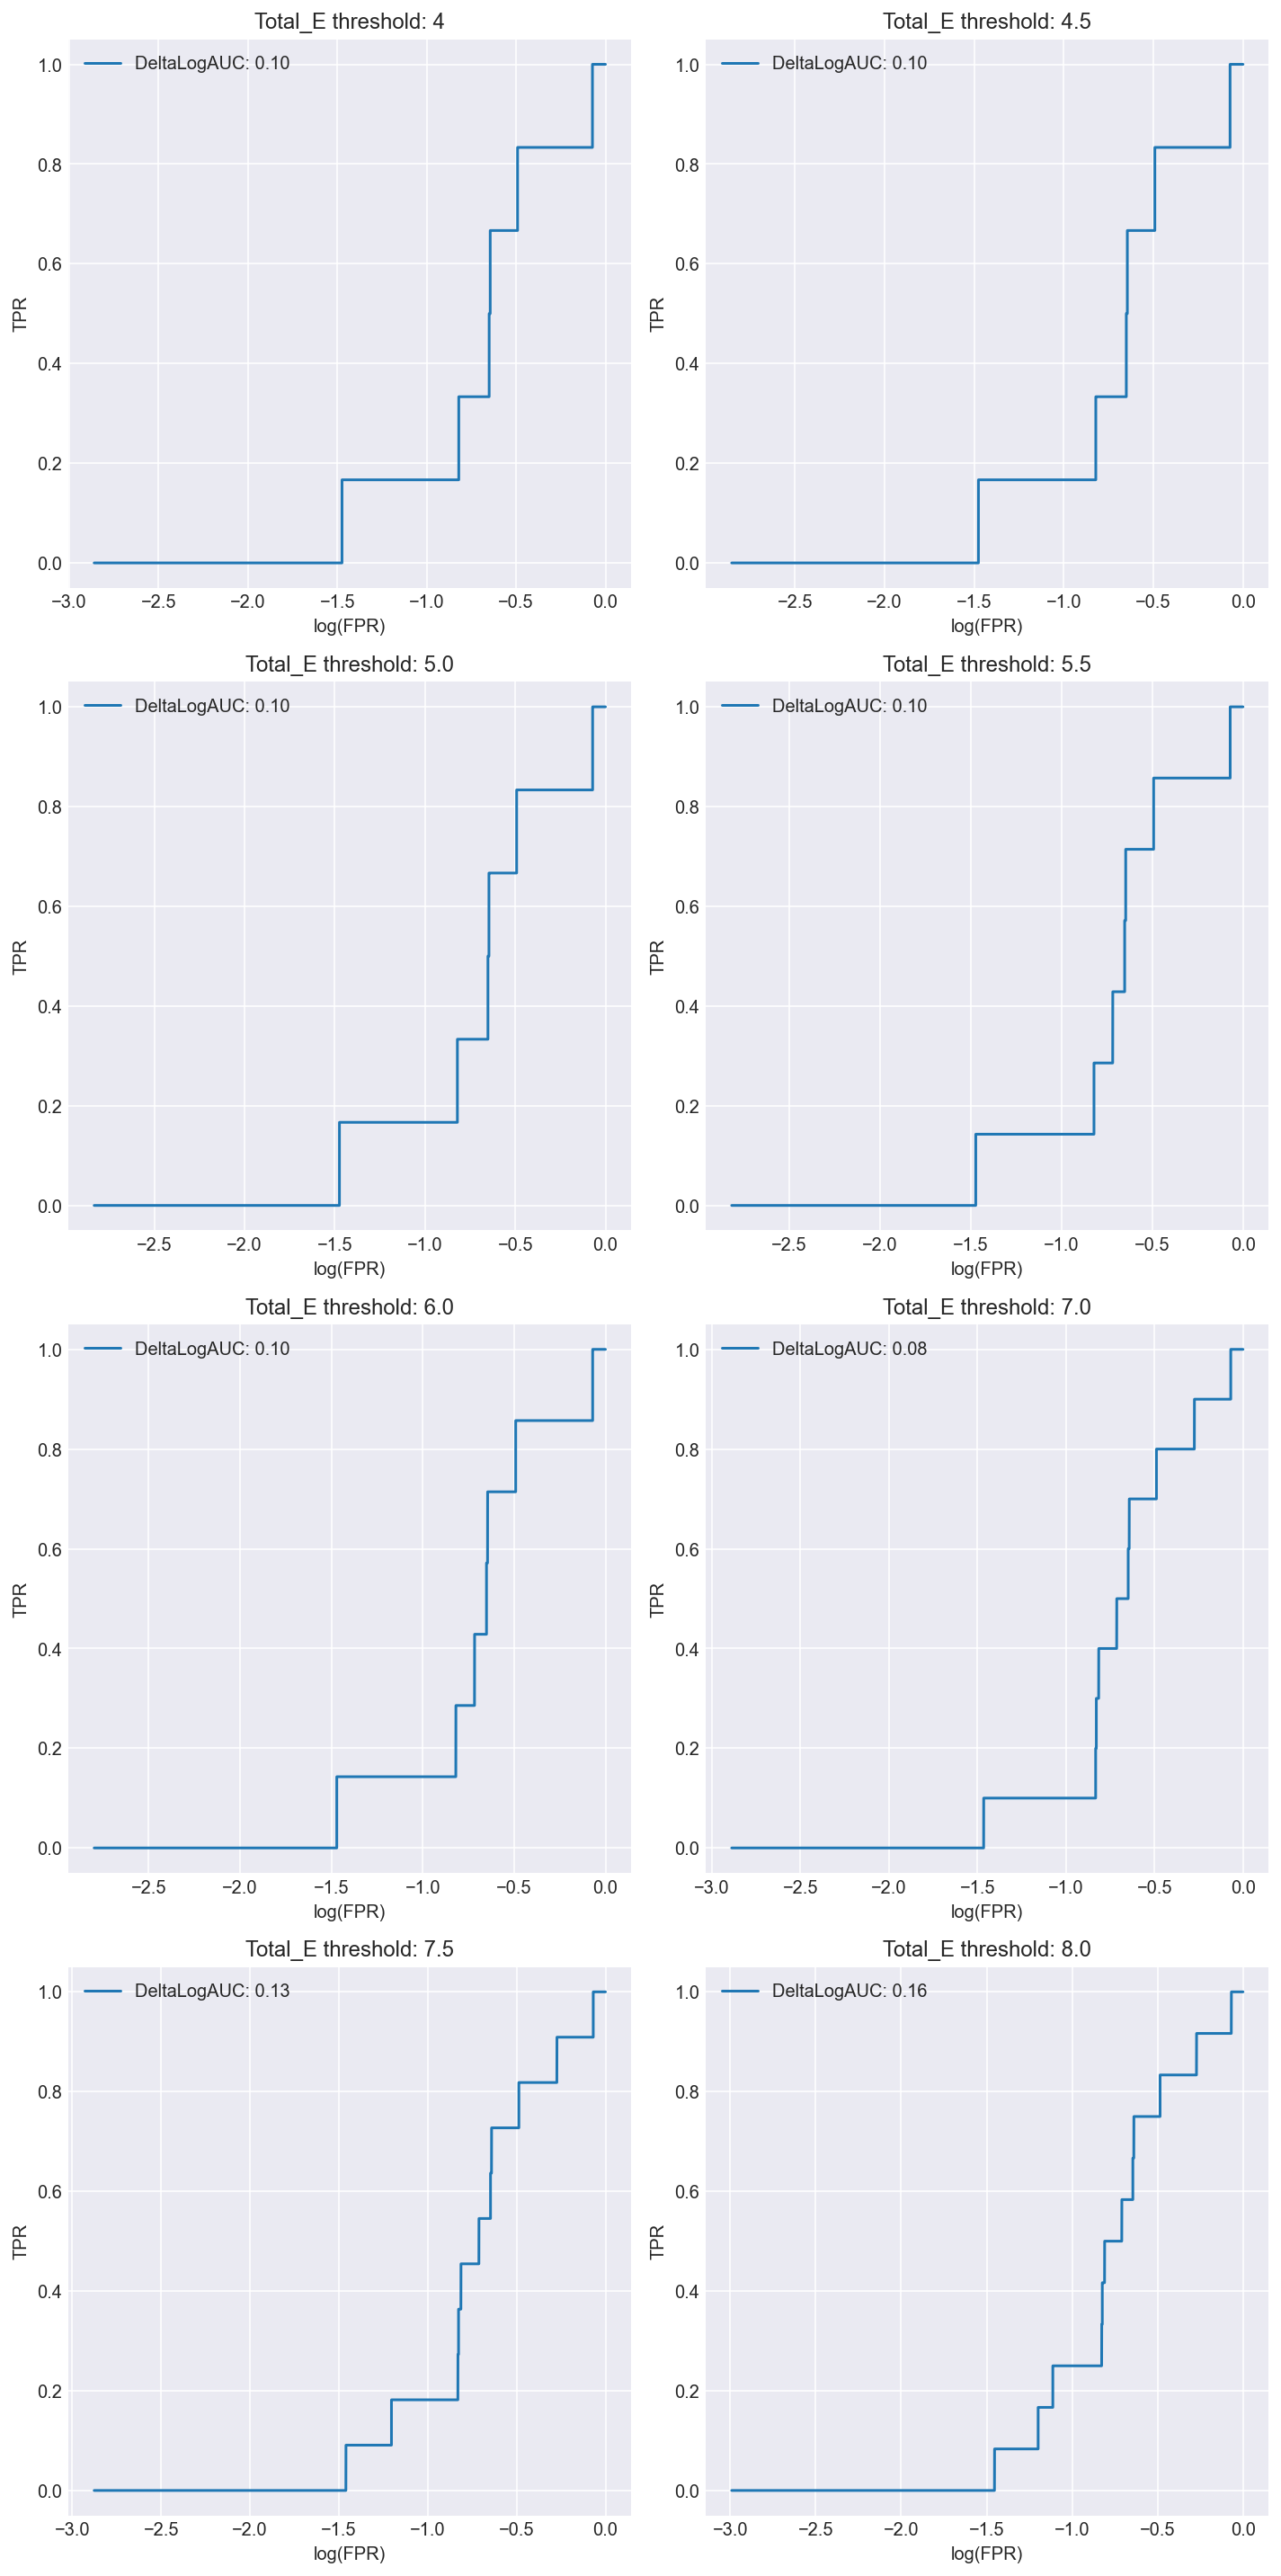

In [55]:
def plot_semi_log_roc(df, a=1e-3, total_e_threshold=None, ax=None):
    # Filter dataframe based on 'Total_E' threshold if provided
    if total_e_threshold is not None:
        df = df[df["Total_E"] <= total_e_threshold]

    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr, _ = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Calculate LogAUC
    log_auc = auc(log_fpr_valid, tpr_valid)

    # Count the number of rows with Activity = 1 and the total number of rows
    activity_1_count = df[df["Activity"] == 1].shape[0]
    total_count = df.shape[0]

    # Plot semi-log ROC curve
    ax.plot(log_fpr_valid, tpr_valid, label=f'LogAUC: {log_auc:.2f}\nActivity=1 count: {activity_1_count}\nTotal count: {total_count}')
    ax.legend()

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Calculate log_auc for no filtering
fpr_none, tpr_none, _ = roc_curve(data["Activity"], -data["r_i_docking_score"])
valid_indices_none = np.where(fpr_none >= 1e-3)
log_auc_none = auc(np.log10(fpr_none[valid_indices_none]), tpr_none[valid_indices_none])

# Plot semi-log ROC curve for each threshold
for i, t in enumerate(total_e_thresholds[1:]):
    ax = axs[i//2, i%2]

    # Filter dataframe based on 'Total_E' threshold
    df_filtered = data[data["Total_E"] <= t]

    # Call the function with the filtered data
    plot_semi_log_roc(df_filtered, total_e_threshold=t, ax=ax)

    # Calculate FPR, TPR, and thresholds for filtered data
    fpr, tpr, _ = roc_curve(df_filtered["Activity"], -df_filtered["r_i_docking_score"])
    valid_indices = np.where(fpr >= 1e-3)
    log_auc = auc(np.log10(fpr[valid_indices]), tpr[valid_indices])

    # Calculate deltaLogAUC
    delta_log_auc = log_auc - log_auc_none

    # Add deltaLogAUC to the legend
    ax.legend([f'DeltaLogAUC: {delta_log_auc:.2f}'])

    ax.set_title(f"Total_E threshold: {t}")
    ax.set_xlabel("log(FPR)")
    ax.set_ylabel("TPR")

plt.tight_layout()
plt.show()

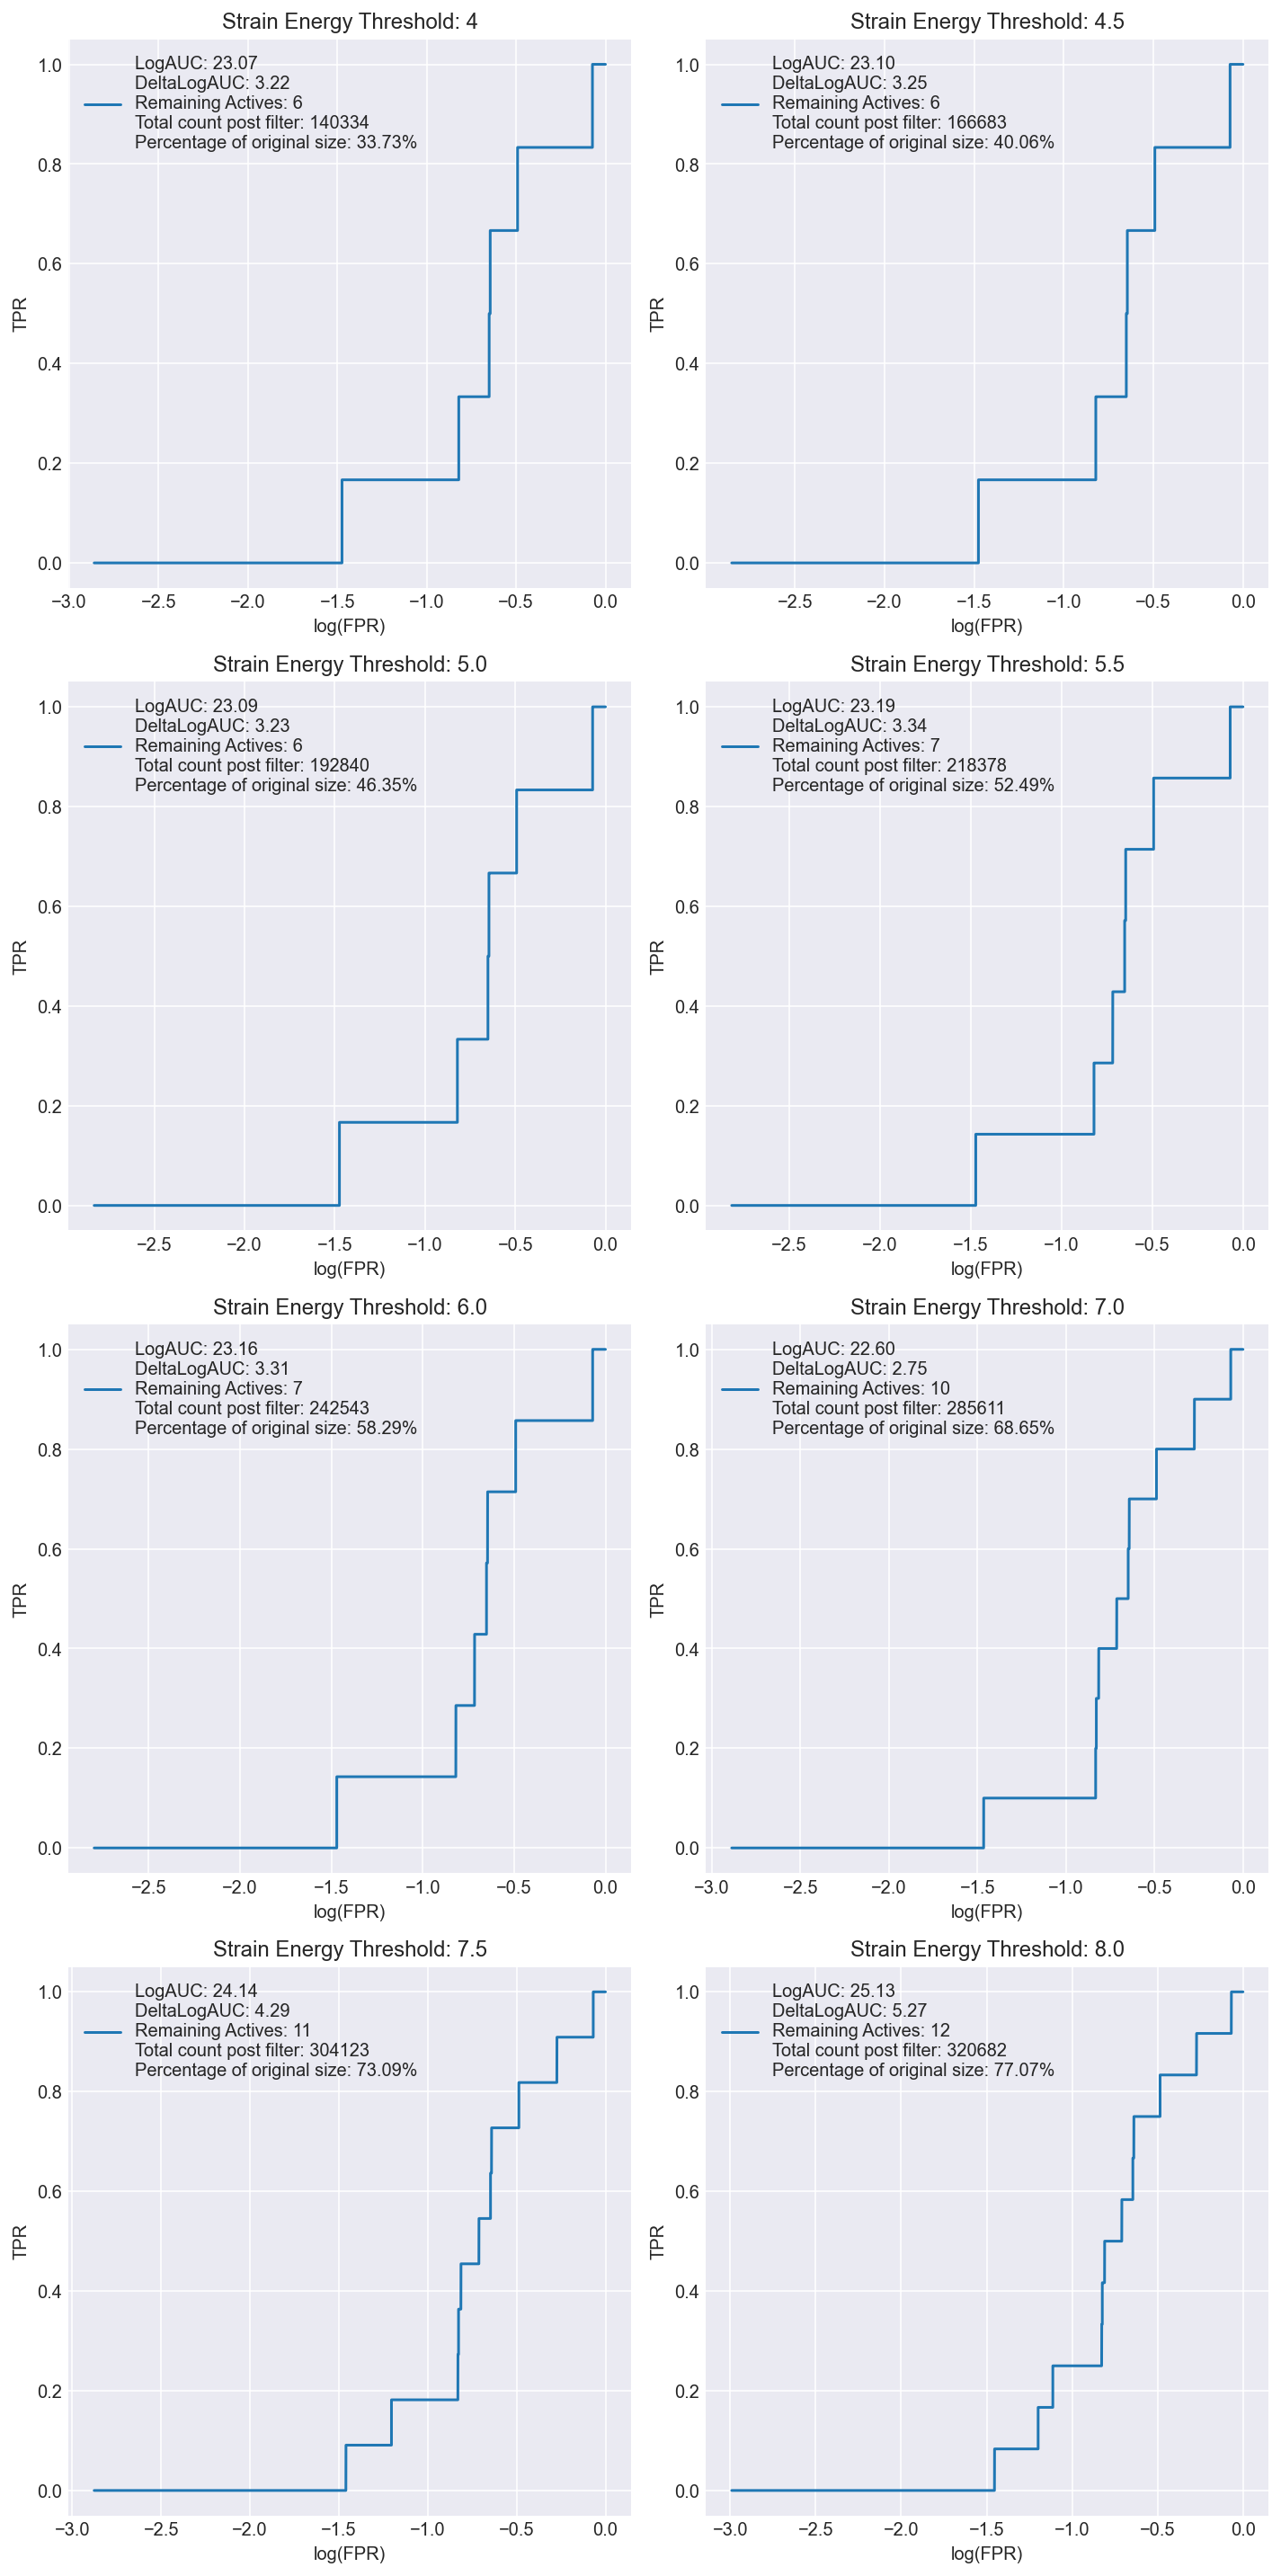

In [65]:
def plot_semi_log_roc(df, a=1e-3, total_e_threshold=None, ax=None):
    # Filter dataframe based on 'Total_E' threshold if provided
    if total_e_threshold is not None:
        df = df[df["Total_E"] <= total_e_threshold]

    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr, _ = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Calculate LogAUC
    log_auc = (auc(log_fpr_valid, tpr_valid)/-np.log10(a))*100

    # Count the number of rows with Activity = 1 and the total number of rows
    activity_1_count = df[df["Activity"] == 1].shape[0]
    total_count = df.shape[0]

    # Plot semi-log ROC curve
    ax.plot(log_fpr_valid, tpr_valid, label=f'LogAUC: {log_auc:.2f}\nActivity=1 count: {activity_1_count}\nTotal count: {total_count}')
    ax.legend()

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Calculate log_auc for no filtering
fpr_none, tpr_none, _ = roc_curve(data["Activity"], -data["r_i_docking_score"])
valid_indices_none = np.where(fpr_none >= 1e-3)
auc_none = auc(np.log10(fpr_none[valid_indices_none]), tpr_none[valid_indices_none])
log_auc_none = (auc_none/-np.log10(1e-3))*100

# Plot semi-log ROC curve for each threshold
for i, t in enumerate(total_e_thresholds[1:]):
    ax = axs[i//2, i%2]

    # Filter dataframe based on 'Total_E' threshold
    df_filtered = data[data["Total_E"] <= t]

    # Call the function with the filtered data
    plot_semi_log_roc(df_filtered, total_e_threshold=t, ax=ax)

    # Calculate FPR, TPR, and thresholds for filtered data
    fpr, tpr, _ = roc_curve(df_filtered["Activity"], -df_filtered["r_i_docking_score"])
    valid_indices = np.where(fpr >= 1e-3)
    auc_base = auc(np.log10(fpr[valid_indices]), tpr[valid_indices])
    log_auc = (auc_base/-np.log10(1e-3))*100

    # Calculate deltaLogAUC
    delta_log_auc = log_auc - log_auc_none

    # Add deltaLogAUC to the legend
    ax.legend([f'LogAUC: {log_auc:.2f}\nDeltaLogAUC: {delta_log_auc:.2f}\nRemaining Actives: {df_filtered[df_filtered["Activity"] == 1].shape[0]}\nTotal count post filter: {df_filtered.shape[0]}\nPercentage of original size: {df_filtered.shape[0]/data.shape[0]*100:.2f}%'])

    ax.set_title(f"Strain Energy Threshold: {t}")
    ax.set_xlabel("log(FPR)")
    ax.set_ylabel("TPR")

plt.tight_layout()
plt.show()

In [ ]:
ax.legend([f'LogAUC: {log_auc:.2f}\nDeltaLogAUC: {delta_log_auc:.2f}\nRemaining Actives: {df_filtered[df_filtered["Activity"] == 1].shape[0]}\nTotal count post filter: {df_filtered.shape[0]}\nPercentage of original size: {df_filtered.shape[0]/data.shape[0]*100:.2f}%'])